In [97]:
import os 
import pandas as pd

In [98]:
import autograd.numpy as np

In [99]:
import matplotlib.pyplot as plt
from matplotlib import gridspec 

In [100]:
import autograd.numpy as np
from autograd import grad

# Exercise 13.1. Two-class classification with neural networks

In [108]:
#data = pd.read_csv('/Users/jazz13/Desktop/2_eggs.csv', delimiter =',')
data = np.loadtxt('/Users/jazz13/Desktop/GitHub_Files/435-deep-learning/2_eggs.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]

print(np.shape(x))
print(np.shape(y))

(2, 96)
(1, 96)


In [109]:
# Creating a network with 4 hidden layers with 10 units in each layer.
N   = 2 #dimension of input 
C   = 1 #dimension of output 
U_1 = 10
U_2 = 10
U_3 = 10
U_4 = 10
layer_sizes = [N, U_1, U_2, U_3,U_4,C]


In [118]:
# normalize the inputs first 
def normlaize(x):
    # compute the mean and standard deviation of the input
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_norm = (x - x_mean)/float(x_std)
    return x_norm

In [111]:
# activation function
def activation(a):   
    #return np.maximum(0,a)
    return np.tanh(a)

In [112]:
def softmax(x,y,w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w).T)))
    return cost/float(np.size(y))

In [113]:
def feature_transforms(a,w):    
    for W in w: # loop through each layer        
        a = W[0] + np.dot(a.T ,  W[1:])        
        a = activation(a).T    
    return a

In [114]:
def model (x, theta):
    # x is input (multiple input for every data sample)    
    f = feature_transforms(x, theta[0])    
    a = theta[1][0] + np.dot(f.T, theta[1][1:])    
    return a

In [115]:
# create initial weights for a neural network model
def network_initializer(layer_sizes, scale):

    # container for all tunable weights
    weights = []
       
    # create appropriately -sized initial
    # weight matrix for each layer of network
    #print( len( layer_sizes ) -1)
    for k in range ( len( layer_sizes ) -1):
    
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k +1]
       
        # make weight matrix
        weight = scale* np.random.randn(U_k+ 1, U_k_plus_1 )
        weights.append(weight)
        
    # repackage weights so that theta_init [0] contains all
    # weight matrices internal to the network , and theta_init [1]
    # contains final linear combination weights
    theta_init = [ weights[: -1], weights[ -1]]

    return theta_init

In [116]:
 # gradient descent function
def gradient_descent (x,y,g, alpha , max_its, w):
    # compute gradient module using autograd
    gradient = grad(g)
    acc = accuracy(x, y, w)
    
    # gradient descent loop
    #weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    accuracy_histroy = [acc]
    iters =[0]
    for k in range( max_its ):
    
        # evaluate the gradient
        grad_eval = gradient(w)
            
        for i in range(len(w[0])):
            w[0][i] = w[0][i] - alpha* grad_eval[0][i]
            
        w[1] = w[1] - alpha* grad_eval[1]
        
        acc = accuracy(x, y, w)
        # record weight and cost
        #weight_history. append(w)
        cost_history.append(g(w))
        iters.append(k+1)
        accuracy_histroy.append(acc)
        
    return  iters, w, cost_history, accuracy_histroy
    
    

In [124]:
def accuracy(x,y,w):
    y_predict = np.sign( model(x,w))
    
    return np.sum( (y_predict == y.T) ) / float(np.size(y))

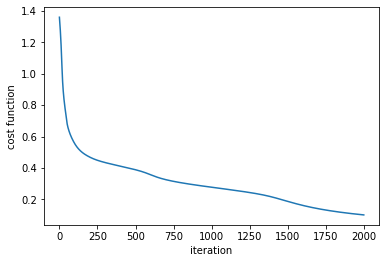

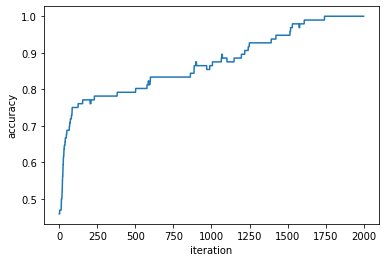

In [123]:
x_normalized = normlaize(x)

scale = 1

theta_init = network_initializer(layer_sizes,scale)

theta = theta_init

alpha = 0.01
max_its = 2000

g = lambda w: softmax(x_normalized,y,w)

iters, theta, cost_history, acc_history = gradient_descent(x_normalized,y,g, alpha , max_its, theta)
y_predict = (model(x_normalized, theta))

plt.figure(1)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.plot(iters, cost_history)

plt.figure(2)
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.plot(iters, acc_history)

# Exercise 13.2 .Multi Class Classification Neural Networks

In [126]:
data = np.loadtxt('/Users/jazz13/Desktop/GitHub_Files/435-deep-learning/3_layercake_data.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]

print(np.shape(x))
print(np.shape(y))

(2, 110)
(1, 110)


In [144]:
N   = 2 #dimension of input 
C   = 3 #dimension of output 
U_1 = 12
U_2 = 5
layer_sizes = [N, U_1, U_2,C]

In [163]:
def multiclass_softmax(w,x,y,iter):     
     # get subset of points
        all_evals = model(x,w)
        # compute softmax across data points
        a = np.log(np.sum(np.exp(all_evals))) 

        # compute cost in compact form using numpy broadcasting
        cost = np.sum(a -y.astype(int).flatten())

        # return average
        return cost/float(np.size(y))

/var/folders/85/0qv3zvwx1r5_c57bw919zvpc0000gn/T/ipykernel_42252/575490115.py:3: RuntimeWarning: invalid value encountered in add
  a = W[0] + np.dot(a.T ,  W[1:])


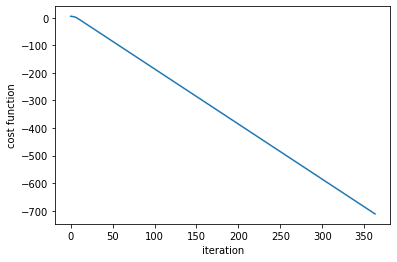

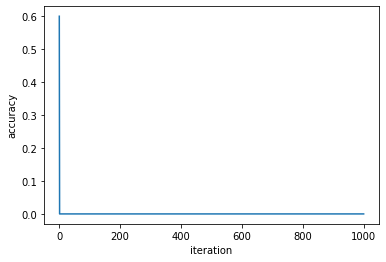

In [164]:
x_normalized = normlaize(x)

scale = 0.1

theta_init = network_initializer(layer_sizes,scale)

theta = theta_init

alpha = 1
max_its = 1000

g = lambda w: multiclass_softmax(w,x,y,iter)

iters, theta, cost_history, acc_history = gradient_descent(x_normalized,y,g, alpha , max_its, theta)
y_predict = (model(x_normalized, theta))

plt.figure(1)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.plot(iters, cost_history)

plt.figure(2)
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.plot(iters, acc_history)

# Exercise 13.3. Number of Weights to Learn in a Neural Network

(a) Find the total number Q of tunable parameters in a general L-hidden-layer neural network, in terms of variables expressed in the layer _sizes in Section 13.2.6

Total number of hidden layers k = 1 to L and there are U_k variables per kth hidden layer. The dimension of the input layer is N so let U_0 = N and dimension of the output layer is $U_{L+1}$ = C. Thus the total number of tunable parameters is  $$ Q = \sum_{k=0}^L (1+U_k)U_{k+1} $$

(b)Based on your answer in part(a), explain how the input dimension N and number of data points P each contributs to Q. How is this different from what you saw with kernel methods in the previous chapter?

Rewriting the above expression for Q by taking out the k = 0 term,we get $$ Q = NU_1 +U_1 + \sum _{k=1} ^{L}(1+U_k)U_{k+1}$$ This shows that Q is directly proportional to N however it is independent with respt to the number of data points P 